In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
bc = load_breast_cancer()
print(bc.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
x = bc['data']
y = bc['target']
x,y,bc.DESCR

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
print("데이터 열 이름: ", bc.feature_names)

데이터 열 이름:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
x_mean_radius = x[:,1].reshape(-1,1)
y = (y==0).astype(np.int)

In [8]:
log_reg = LogisticRegression()
log_reg.fit(x_mean_radius, y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

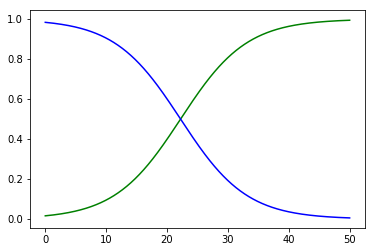

In [9]:
x_new = np.linspace(0, 50, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(x_new)
plt.plot(x_new, y_prob[:,1], 'g-', label='Breath_Cancer')
plt.plot(x_new, y_prob[:,0], 'b-', label='Not Breath_Cancer')

In [10]:
y_score = log_reg.decision_function(x_mean_radius)
y_pred = log_reg.predict(x_mean_radius)

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [12]:
y_score

array([-2.18129965e+00, -8.19983911e-01, -1.78931301e-01, -3.39194454e-01,
       -1.45182599e+00, -1.20129969e+00, -4.12878662e-01, -2.56299720e-01,
       -7.39313049e-02,  3.35016050e-01,  1.87647634e-01, -7.97878649e-01,
        4.75016045e-01,  3.18437103e-01,  7.15950060e-02,  9.79752870e-01,
       -3.85247084e-01, -2.83931298e-01, -1.31418333e-02, -1.44814178e+00,
       -1.19945758e+00, -1.80182598e+00, -1.46656284e+00,  1.50805530e-01,
       -1.54983934e-01, -1.07235232e+00, -1.27352356e-01, -3.63141821e-01,
        5.61594989e-01, -1.32103653e+00,  5.32121306e-01, -6.48668127e-01,
        3.23963418e-01,  7.82647613e-01, -7.99720754e-01, -1.16299725e-01,
       -9.23523569e-02, -7.00247073e-01,  5.48700253e-01, -2.58141825e-01,
       -1.18141830e-01, -1.60510249e-01,  4.76858150e-01, -3.57615506e-01,
       -7.57734101e-02, -8.51299700e-01, -9.91299695e-01, -6.56036548e-01,
       -1.39840494e+00,  1.44897447e-02, -1.14457619e-01, -1.08340495e+00,
       -7.33404967e-01, -

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [14]:
df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)

In [15]:
display(df.head(), df.tail())

,y_score,y_pred,y
0,3.142384,1.0,1.0
1,2.134753,1.0,0.0
2,2.088700,1.0,1.0
3,1.887911,1.0,1.0
4,1.639227,1.0,1.0


,y_score,y_pred,y
564,-2.087352,0.0,0.0
565,-2.100247,0.0,0.0
566,-2.118668,0.0,0.0
567,-2.181300,0.0,1.0
568,-2.304721,0.0,0.0


ROC, PR 곡선 그리기

In [19]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_mean_radius, y)

In [22]:
model = LogisticRegression().fit(x_mean_radius,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [24]:
print(roc_auc)

0.7736897274633123


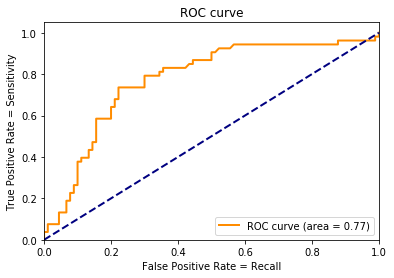

In [25]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in cv.split(x_mean_radius):
    print(x_mean_radius[train_index], y[test_index])

[[10.38]
 [21.25]
 [20.38]
 [14.34]
 [15.7 ]
 [19.98]
 [21.82]
 [24.04]
 [17.89]
 [23.95]
 [20.13]
 [22.15]
 [14.36]
 [14.26]
 [23.04]
 [21.38]
 [16.4 ]
 [21.53]
 [20.25]
 [25.27]
 [15.05]
 [23.98]
 [26.47]
 [17.88]
 [21.59]
 [21.72]
 [25.2 ]
 [20.82]
 [21.58]
 [21.35]
 [24.81]
 [20.28]
 [21.81]
 [18.66]
 [14.63]
 [21.6 ]
 [16.34]
 [18.24]
 [18.7 ]
 [18.75]
 [21.59]
 [19.31]
 [11.79]
 [14.88]
 [20.98]
 [22.15]
 [13.86]
 [19.04]
 [16.49]
 [21.31]
 [24.52]
 [15.79]
 [16.52]
 [16.15]
 [18.  ]
 [20.97]
 [15.86]
 [24.91]
 [26.29]
 [15.65]
 [21.46]
 [24.59]
 [21.8 ]
 [22.76]
 [14.76]
 [18.3 ]
 [19.83]
 [23.03]
 [12.84]
 [19.77]
 [19.29]
 [15.56]
 [18.33]
 [21.26]
 [16.99]
 [20.76]
 [15.83]
 [21.53]
 [15.76]
 [16.67]
 [20.01]
 [10.82]
 [17.12]
 [20.2 ]
 [10.89]
 [16.39]
 [17.21]
 [16.39]
 [25.12]
 [13.29]
 [19.48]
 [13.93]
 [22.47]
 [16.67]
 [17.57]
 [13.39]
 [18.05]
 [15.92]
 [14.65]
 [16.58]
 [18.77]
 [15.18]
 [17.91]
 [20.78]
 [20.7 ]
 [15.34]
 [15.34]
 [20.74]
 [12.74]
 [20.18]
 [15.94]
 

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [31]:
scores = cross_val_score(LogisticRegression(), x_mean_radius, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

array([0.68421053, 0.77192982, 0.66666667, 0.64912281, 0.71681416])

In [32]:
scores = cross_val_score(LogisticRegression(), x_mean_radius, y) 
scores 


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.71052632, 0.71052632, 0.61904762])

In [33]:
scores = cross_val_score(LogisticRegression(), x_mean_radius, y, cv=5)
scores

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

array([0.72173913, 0.68695652, 0.73451327, 0.68141593, 0.62831858])

In [34]:
display(scores.mean(), scores.var())

0.6905886879569064

0.0013749234655469514

제가 decision tree에 대한 이해가 아직 제대로 되지 않았습니다..ㅠ 학습 이후에 다시 보완해서 수정하겠습니다!